In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
car_data = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_data.size

34720

In [5]:
car_data.shape

(4340, 8)

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
features = ["fuel", "seller_type", "transmission", "owner"]
for feature in features:
    print(car_data[feature].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [8]:
y = car_data["selling_price"]

In [9]:
car_data = car_data.drop(["selling_price"],axis=1)

In [10]:
car_data = car_data

In [11]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [12]:
car_data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


In [13]:
car_data.isnull().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64

In [14]:
y.isnull().sum()

0

In [15]:
car_data.describe()

,year,km_driven
count,4340.000000,4340.000000
mean,2013.090783,66215.777419
std,4.215344,46644.102194
min,1992.000000,1.000000
25%,2011.000000,35000.000000
50%,2014.000000,60000.000000
75%,2016.000000,90000.000000
max,2020.000000,806599.000000


In [19]:
car_data["Present_Year"] = 2021

car_data["No_of_Years"] = car_data['Present_Year'] - car_data['year']

In [20]:
car_data.drop(["year","Present_Year","name"], axis=1, inplace=True)

In [22]:
car_data.head()

,km_driven,fuel,seller_type,transmission,owner,No_of_Years
0,70000,Petrol,Individual,Manual,First Owner,14
1,50000,Petrol,Individual,Manual,First Owner,14
2,100000,Diesel,Individual,Manual,First Owner,9
3,46000,Petrol,Individual,Manual,First Owner,4
4,141000,Diesel,Individual,Manual,Second Owner,7


In [23]:
car_data = pd.get_dummies(car_data, drop_first=True)

In [24]:
car_data.head()

,km_driven,No_of_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [25]:
profile = ProfileReport(car_data, title = "Profile report", explorative=True, dark_mode=True)

In [26]:
profile.to_widgets()

<AxesSubplot:>

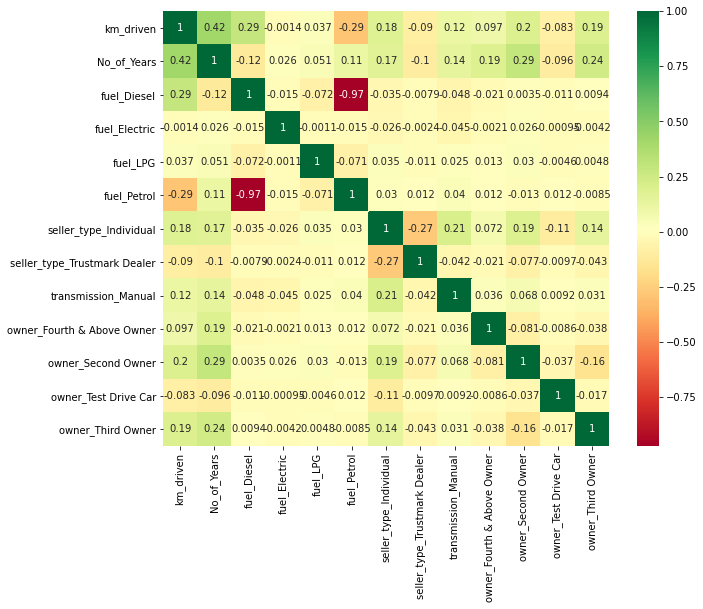

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(car_data.corr(), annot=True,cmap="RdYlGn")

In [31]:
X = car_data

In [32]:
X.head()

,km_driven,No_of_Years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [33]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [34]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
model.feature_importances_

array([2.45765057e-01, 2.46261377e-01, 1.30228816e-01, 3.22553648e-05,
       2.74780248e-05, 1.89277156e-04, 4.69901664e-02, 8.48917791e-03,
       2.92828391e-01, 9.11434649e-04, 2.22877404e-02, 1.24897784e-03,
       4.73985039e-03])

In [36]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)

In [37]:
feat_imp

km_driven                       0.245765
No_of_Years                     0.246261
fuel_Diesel                     0.130229
fuel_Electric                   0.000032
fuel_LPG                        0.000027
fuel_Petrol                     0.000189
seller_type_Individual          0.046990
seller_type_Trustmark Dealer    0.008489
transmission_Manual             0.292828
owner_Fourth & Above Owner      0.000911
owner_Second Owner              0.022288
owner_Test Drive Car            0.001249
owner_Third Owner               0.004740
dtype: float64

In [40]:
feat_imp.nlargest(5)

transmission_Manual       0.292828
No_of_Years               0.246261
km_driven                 0.245765
fuel_Diesel               0.130229
seller_type_Individual    0.046990
dtype: float64

<AxesSubplot:>

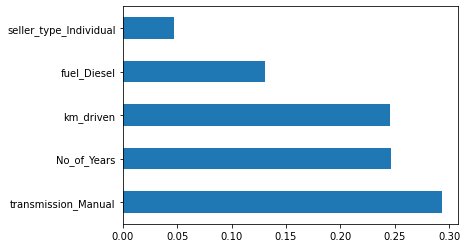

In [41]:
feat_imp.nlargest(5).plot(kind='barh')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
grid = {"n_estimators":n_estimators,
        "max_features":max_features,
        "max_depth":max_depth,
        "min_samples_split":min_samples_split,
        "min_samples_leaf":min_samples_leaf}

In [60]:
from sklearn.ensemble import RandomForestRegressor

random_rf = RandomForestRegressor()

In [63]:
random_rf_grid = RandomizedSearchCV(random_rf, param_distributions=grid, scoring='neg_mean_squared_error',
                              n_jobs=1, cv=5, verbose=2)

In [64]:
random_rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [65]:
random_rf_grid.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [66]:
random_rf = RandomForestRegressor(n_estimators= 400,
                                    min_samples_split= 15,
                                    min_samples_leaf= 1,
                                    max_features= 'sqrt',
                                    max_depth= 20)

In [68]:
random_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=15,
                      n_estimators=400)

In [69]:
y_predict = random_rf.predict(X_test)

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 172940.59906423924
MSE: 104484818150.6085
RMSE: 323241.11457332975


C:\Users\prati\Anaconda3\envs\global_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

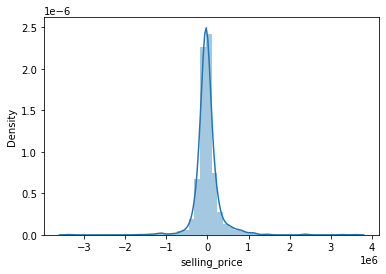

In [72]:
sns.distplot(y_test-y_predict)

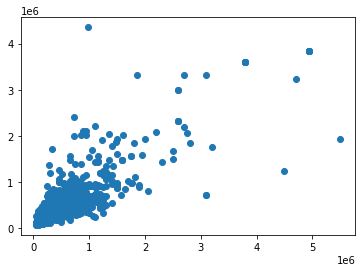

In [73]:
plt.scatter(y_test, y_predict)

In [74]:
pd.DataFrame(y_test)

,selling_price
2089,465000
1077,1580000
1495,150000
555,4950000
2615,125000
...,...
2933,285000
4181,225000
3326,120000
628,350000


In [77]:
pd.DataFrame(y_predict,index=y_test.index)

,0
2089,1.061136e+06
1077,1.486420e+06
1495,2.329317e+05
555,3.831236e+06
2615,2.227023e+05
...,...
2933,4.918495e+05
4181,3.144813e+05
3326,1.328099e+05
628,3.547427e+05


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_rf, file)